In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import re
import os

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations

How to improve the data
* good column names from the start
* no unnecessary whitespace
* sensible group names

# Diagnostic plots

In [199]:
log = pd.read_csv('log_4_6_20180828_14_04_21.csv', sep=',')

### Accept + move type statistics

In [200]:
log['accept'].value_counts()

0.0    3481654
1.0     361484
Name: accept, dtype: int64

In [201]:
log['type'].value_counts()

D    1334430
B    1332824
M    1332746
Name: type, dtype: int64

In [202]:
log.groupby('accept')['type'].value_counts()

accept  type
0.0     M       1221456
        D       1197509
        B       1062689
1.0     B        137101
        D        136921
        M         87462
Name: type, dtype: int64

### Convergence

In [203]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'])

In [204]:
block_length = 40000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)
groupby_blocks = np.array([0] + list(groupby_blocks+1))[0:-1]

In [205]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

In [206]:
groupedmeanlog = log.groupby([groupby_blocks])['energy','no_act_vrt','time'].mean().reset_index()

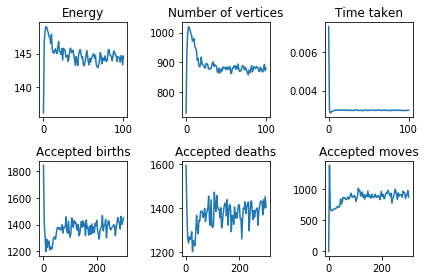

In [207]:

plt.subplot(2,3,1)
plt.title('Energy')
groupedmeanlog['energy'].plot()

plt.subplot(2,3,2)
plt.title('Number of vertices')
groupedmeanlog['no_act_vrt'].plot()

plt.subplot(2,3,3)
plt.title('Time taken')
groupedmeanlog['time'].plot()

plt.subplot(2,3,4)
plt.title('Accepted births')
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

plt.subplot(2,3,5)
plt.title('Accepted deaths')
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

plt.subplot(2,3,6)
plt.title('Accepted moves')
groupedlog[groupedlog['type'] == 'M']['accept'].plot()


plt.tight_layout()
plt.show()

# plt.savefig('foo.pdf')

In [34]:
log['energy'] - log['energy_after']

0            0.089
1         -135.178
2         -135.178
3         -135.178
4         -135.178
5            0.130
6         -135.308
7         -135.308
8            0.065
9         -135.373
10        -135.373
11        -135.373
12           0.088
13        -135.461
14          -0.035
15        -135.426
16           0.076
17        -135.426
18           0.080
19        -135.506
20           0.081
21        -135.506
22           0.072
23           0.080
24        -135.658
25        -135.658
26        -135.658
27        -135.658
28        -135.658
29           0.084
            ...   
3999970        NaN
3999971   -145.097
3999972   -145.097
3999973   -145.097
3999974   -145.097
3999975   -145.097
3999976   -145.097
3999977   -145.097
3999978   -145.097
3999979   -145.097
3999980   -145.097
3999981   -145.097
3999982   -145.097
3999983   -145.097
3999984   -145.097
3999985   -145.097
3999986   -145.097
3999987   -145.097
3999988   -145.097
3999989   -145.097
3999990   -145.097
3999991   -1

### Checking if the energy does not move by itself

In [89]:
lognona = log[~log.isnull().any(axis=1)]
logshift = lognona.assign(shiftenergy = lognona['energy'].shift(-1))

In [90]:
logshift[(logshift['shiftenergy'] - logshift['energy'] != 0) & (logshift['accept'] != 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time,shiftenergy
1999999,2000000,B,0.260079 0.576914 0.170576 0.0041291,,145.211,-1.0,0.762074,0.511364,0.0,6142.0,871.0,0.002197,NaN


# Cell data distributions

In [5]:
for filename in os.listdir('celldata'):
    print(filename)

cell_data_3_6_20180903_09_48_14.txt
cell_data_3_6_20180902_23_09_21.txt
cell_data_3_6_20180903_09_42_24.txt
cell_data_3_6_20180902_20_02_51.txt
cell_data_3_6_20180903_15_11_51.txt
cell_data_3_6_20180902_20_01_41.txt
cell_data_3_6_20180901_20_42_49.txt
cell_data_3_6_20180903_13_06_20.txt
cell_data_3_6_20180903_13_23_51.txt
cell_data_3_6_20180901_17_42_11.txt
cell_data_3_6_20180903_08_26_49.txt
cell_data_3_6_20180902_20_03_24.txt
cell_data_3_6_20180903_08_24_47.txt
cell_data_3_6_20180903_13_07_01.txt
cell_data_3_6_20180903_08_27_50.txt
cell_data_3_6_20180903_08_27_20.txt
cell_data_3_6_20180903_11_15_31.txt
cell_data_3_6_20180901_17_43_03.txt
cell_data_3_6_20180903_16_18_30.txt
cell_data_3_6_20180902_20_05_44.txt
cell_data_3_6_20180903_13_06_14.txt
cell_data_3_6_20180903_08_28_23.txt
cell_data_3_6_20180901_20_43_52.txt
cell_data_3_6_20180901_17_41_34.txt
cell_data_3_6_20180903_09_48_17.txt
cell_data_3_6_20180901_21_05_32.txt
cell_data_3_6_20180903_11_14_59.txt
cell_data_3_6_20180901_20_36

In [4]:
cell_data = pd.read_csv('cell_data_3_6_20180831_18_13_40.txt', sep=';')

FileNotFoundError: File b'cell_data_3_6_20180831_18_13_40.txt' does not exist

In [48]:
cell_data

,epsilon,alpha,theta,z,max_weight,energy,tetra_volume,tetra_circum,face_surf,edge_length,...,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0.001,5,-10,500,0.01,-1591.68,"[0.000534902, 8.94639e-05, 0.000124485, 0.0004...","[0.135477, 0.120256, 0.0957861, 0.127901, 0.07...","[0.00617284, 0.0106917, 0.00872971, 0.00617284...","[0.111111, 0.157135, 0.157135, 0.111111, 0.111...",...,"[7, 14, 18, 23, 13, 33, 25, 17, 23, 19, 6, 14,...",3793,470,463,0.026366,0.001001,1.49465,-8.63193,498.025,-8.61935


In [50]:
def listify(string):
        strlist = string[1:-2].replace(' ','').split(',')[:-1]
        result = [float(num) for num in strlist]
        return(result)

In [51]:
volumes = listify(cell_data.tetra_volume[0])

In [52]:
print(np.mean(volumes), np.std(volumes))

0.00029843783539414717 0.00029360422884020036


In [53]:
bins = np.linspace(0,0.002,30)

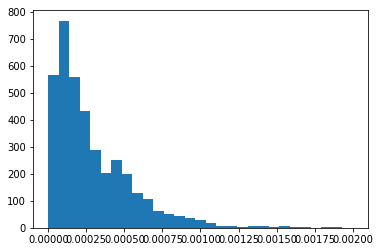

In [54]:
plt.hist(volumes,bins)
plt.show()

---

In [55]:
cell_data_neg = pd.read_csv('cell_data_3_6_20180831_18_11_39.txt', sep=';')

In [56]:
cell_data_neg

,epsilon,alpha,theta,z,max_weight,energy,tetra_volume,tetra_circum,face_surf,edge_length,...,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0.001,5,-0.5,500,0.01,-61.2288,"[0.000285411, 0.000127963, 0.000510876, 0.0004...","[0.105933, 0.0840322, 0.143584, 0.140514, 0.11...","[0.00872971, 0.0106917, 0.0106389, 0.0105352, ...","[0.111111, 0.157135, 0.157135, 0.142383, 0.111...",...,"[10, 17, 18, 32, 15, 9, 13, 21, 14, 19, 17, 18...",2815,443,439,0.023581,0.001005,0.948256,0.482709,452.767,0.629473


In [77]:
len(listify(cell_data_neg.tetra_circum[0]))

2815

In [78]:
len(listify(cell_data_neg.point_degree[0]))

443

### Volumes

In [59]:
volumes_neg = listify(cell_data_neg.tetra_volume[0])

In [60]:
len(volumes)

3793

In [61]:
print(np.mean(volumes_neg), np.std(volumes_neg))

0.00037045249720781524 0.00039554259025342445


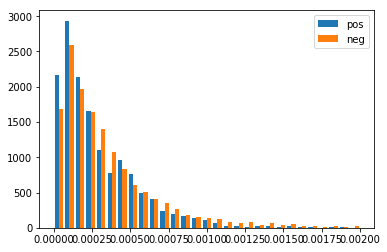

In [62]:
plt.hist([volumes,volumes_neg],bins, density = True,  label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Circumradius

In [63]:
circum = listify(cell_data.tetra_circum[0])
circum_neg = listify(cell_data_neg.tetra_circum[0])

In [81]:
bins_circum = np.linspace(0.03,0.5,50)

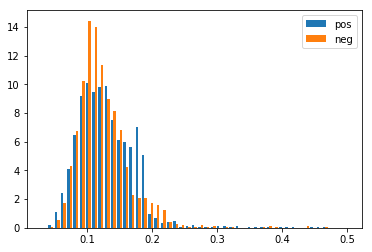

In [82]:
plt.hist([circum,circum_neg],bins_circum, density = True, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Face surface

In [66]:
surf = listify(cell_data.face_surf[0])
surf_neg = listify(cell_data_neg.face_surf[0])

In [67]:
bins_surf = np.linspace(0.0004,0.05,30)

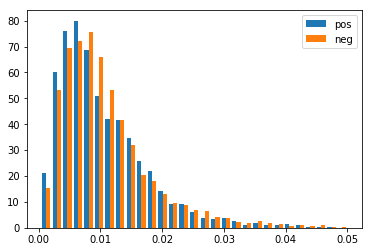

In [68]:
plt.hist([surf,surf_neg],bins_surf, density = True, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Edge length

In [69]:
length = listify(cell_data.edge_length[0])
length_neg = listify(cell_data_neg.edge_length[0])

In [70]:
bins_length = np.linspace(0.01,0.5,30)

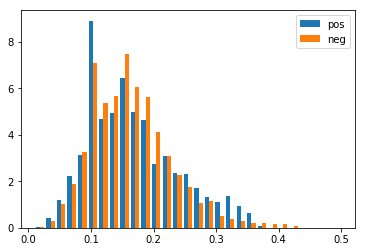

In [71]:
plt.hist([length,length_neg],bins_length, density = True, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Point degree

In [44]:
deg = listify(cell_data.point_degree[0])
deg_neg =  listify(cell_data_neg.point_degree[0])

In [45]:
bins_deg = np.linspace(0,40,30)

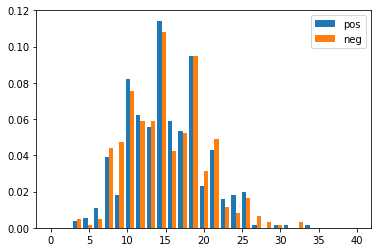

In [46]:
plt.hist([deg,deg_neg],bins_deg, density = True, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

---

## Parsing SLURM logs

- Circumradius different length
- Files not saved
- Some logs end prematurely despite exitcode 0
- Negative theta
- Nonsense results in estimation sometimes
- Estimates are not centered at the estimated value

In [6]:
def extract_data(filename):
    lines = []
    with open(filename,  'r') as slurm:
        for line in slurm:
            lines += [line]
            
    numbers_unflat = [re.findall("\d+\.\d+|\d+", line) for line in lines]
    data = []
    if len(numbers_unflat) == 12:
        numbers = [float(number) for sublist in numbers_unflat for number in sublist]
        data = [filename] + [numbers[i] for i in [3,4,5,6,7,8,11,12,13,14,15,16,18,19,20]]

    return(data)

In [7]:
columns = ['filename','theta','epsilon','alpha','z','max_weight', 'iterations','pts','pts_active','pts_removable','min_edge_est','epsilon_est','alpha_est','theta_est','z_est','theta_z_known_est']

df = pd.DataFrame(columns=columns)

In [20]:
data = []
success = 0
total = 0

for filename in os.listdir('slurmlogs'):
    total += 1
    slurm_parsed = extract_data('slurmlogs/' + filename) 
    if len(slurm_parsed) == 16:
        data += [slurm_parsed]
        success += 1
    
print('Success rate:', success, 'out of', total,'. (',success/total, ')')

Success rate: 303 out of 303 . ( 1.0 )


In [9]:
for i, row in enumerate(data):
    df.loc[i] = row

## $\theta$ = 2

In [25]:
df = df.loc[df['theta'] == 2.0,]

In [31]:
df

,filename,theta,epsilon,alpha,z,max_weight,iterations,pts,pts_active,pts_removable,min_edge_est,epsilon_est,alpha_est,theta_est,z_est,theta_z_known_est
0,slurmlogs/slurm-1969770.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5685.0,414.0,324.0,0.017646,0.000592,0.199717,1.609680,369.314,2.19279
1,slurmlogs/slurm-1969650.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5707.0,436.0,347.0,0.012040,0.000249,0.199460,3.008440,438.107,3.20038
2,slurmlogs/slurm-1969764.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5649.0,378.0,311.0,0.012036,0.000108,0.199710,2.528960,399.237,3.05594
4,slurmlogs/slurm-1969731.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5679.0,408.0,342.0,0.013886,0.000105,0.197951,3.604800,467.541,3.76694
5,slurmlogs/slurm-1969711.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5663.0,392.0,319.0,0.011374,0.000147,0.198508,2.407590,396.338,2.76919
6,slurmlogs/slurm-1969854.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5697.0,426.0,348.0,0.006540,0.000157,0.198203,3.093210,441.887,3.26582
7,slurmlogs/slurm-1969775.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5668.0,397.0,335.0,0.016887,0.000196,0.199825,1.624860,380.718,2.10029
8,slurmlogs/slurm-1969916.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5685.0,414.0,331.0,0.018199,0.000424,0.198859,1.819890,374.238,2.22806
9,slurmlogs/slurm-1969752.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5695.0,424.0,362.0,0.018707,0.000255,0.195951,4.556380,514.115,4.49486
10,slurmlogs/slurm-1969726.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5666.0,395.0,315.0,0.014329,0.000211,0.199889,3.802190,460.553,3.93735


### Weird observations

In [26]:
df.loc[df['epsilon_est'] > 1,]

,filename,theta,epsilon,alpha,z,max_weight,iterations,pts,pts_active,pts_removable,min_edge_est,epsilon_est,alpha_est,theta_est,z_est,theta_z_known_est


In [27]:
df.loc[df['theta_est'] > 10,]

,filename,theta,epsilon,alpha,z,max_weight,iterations,pts,pts_active,pts_removable,min_edge_est,epsilon_est,alpha_est,theta_est,z_est,theta_z_known_est


### Continue without them

In [29]:
df = df.loc[df['theta_est'] < 10,]

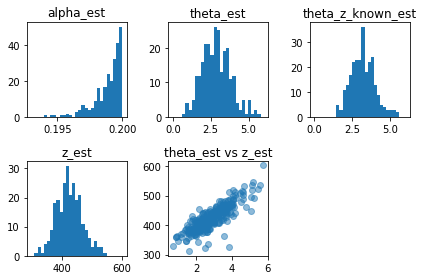

In [30]:
plt.subplot(2,3,1)
plt.title('alpha_est')
plt.hist(df['alpha_est'],bins = np.linspace(0.193,0.2,30))

plt.subplot(2,3,2)
plt.title('theta_est')
plt.hist(df['theta_est'], bins = np.linspace(0,6,30))

plt.subplot(2,3,3)
plt.title('theta_z_known_est')
plt.hist(df['theta_z_known_est'], bins = np.linspace(0,6,30))

plt.subplot(2,3,4)
plt.title('z_est')
plt.hist(df['z_est'], bins = np.linspace(300,600,30))

plt.subplot(2,3,5)
plt.title('theta_est vs z_est')
plt.scatter(df['theta_est'], df['z_est'], alpha=0.5)

plt.tight_layout()
plt.show()